In [1]:
import numpy as np
import math
from numpy import linalg as LA
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [4]:
# 1D system using y=u'
def fun1(x, y):
    eps = 1
    return np.vstack((y[1], -y[1]/eps))
def fun2(x, y):
    eps = 0.1
    return np.vstack((y[1], -y[1]/eps))
def fun3(x, y):
    eps = 0.01
    return np.vstack((y[1], -y[1]/eps))
def fun4(x, y):
    eps = 0.001
    return np.vstack((y[1], -y[1]/eps))
def fun_exact(x,eps):
    return [(1-math.exp(-u/eps))/(1-math.exp(-1/eps)) for u in x]

def fun_num1(eps,N):
    h = 1.0 / (N-1)
    return [(1-((2*eps-h)**k/(2*eps+h)**k))/(1-((2*eps-h)**N/(2*eps+h)**N)) for k in range(0,N)]
def fun_num2(eps,N):
    h = 1.0 / (N-1)
    return [(1-(eps/(eps+h))**k)/(1-(eps/(eps+h))**N) for k in range(0,N)]

# boundary conditions:
def bc(ya, yb):
    return np.array([ya[0], yb[0]-1])

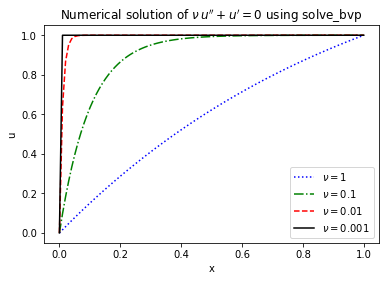

In [5]:
x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0] = 3
res1 = solve_bvp(fun1, bc, x, y)
res2 = solve_bvp(fun2, bc, x, y)
res3 = solve_bvp(fun3, bc, x, y)
res4 = solve_bvp(fun4, bc, x, y)

x_plot = np.linspace(0, 1, 100)
y1_plot = res1.sol(x_plot)[0]
y2_plot = res2.sol(x_plot)[0]
y3_plot = res3.sol(x_plot)[0]
y4_plot = res4.sol(x_plot)[0]

plt.plot(x_plot, y1_plot, 'b:',label=r'$\nu=1$')
plt.plot(x_plot, y2_plot, 'g-.',label=r'$\nu=0.1$')
plt.plot(x_plot, y3_plot, 'r--',label=r'$\nu=0.01$')
plt.plot(x_plot, y4_plot, 'k-',label=r'$\nu=0.001$')
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='best')
plt.title("Numerical solution of " +  r'$\nu\,u^{\prime\prime}+u^{\prime}=0$' + ' using solve_bvp')
plt.show()

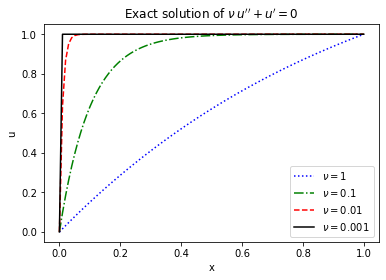

In [6]:
plt.plot(x_plot, fun_exact(x_plot, 1), 'b:',label=r'$\nu=1$')
plt.plot(x_plot, fun_exact(x_plot, 0.1), 'g-.',label=r'$\nu=0.1$')
plt.plot(x_plot, fun_exact(x_plot, 0.01), 'r--',label=r'$\nu=0.01$')
plt.plot(x_plot, fun_exact(x_plot, 0.001), 'k-',label=r'$\nu=0.001$')
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='best')
plt.title("Exact solution of " +  r'$\nu\,u^{\prime\prime}+u^{\prime}=0$')
plt.show()

In [7]:
LA.norm(fun_exact(x_plot, 1)-y1_plot)

6.362907111890513e-05

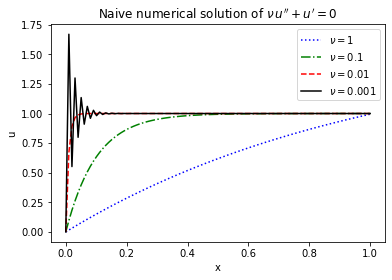

In [8]:
N = len(x_plot)
plt.plot(x_plot, fun_num1(1,N), 'b:',label=r'$\nu=1$')
plt.plot(x_plot, fun_num1(0.1,N), 'g-.',label=r'$\nu=0.1$')
plt.plot(x_plot, fun_num1(0.01,N), 'r--',label=r'$\nu=0.01$')
plt.plot(x_plot, fun_num1(0.001,N), 'k-',label=r'$\nu=0.001$')
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='best')
plt.title("Naive numerical solution of " +  r'$\nu\,u^{\prime\prime}+u^{\prime}=0$')
plt.show()

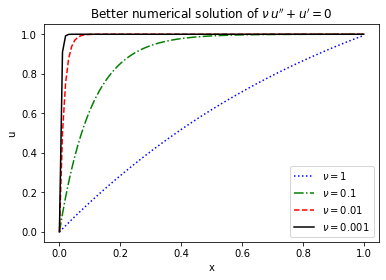

In [10]:
plt.plot(x_plot, fun_num2(1,N), 'b:',label=r'$\nu=1$')
plt.plot(x_plot, fun_num2(0.1,N), 'g-.',label=r'$\nu=0.1$')
plt.plot(x_plot, fun_num2(0.01,N), 'r--',label=r'$\nu=0.01$')
plt.plot(x_plot, fun_num2(0.001,N), 'k-',label=r'$\nu=0.001$')
plt.legend()
plt.xlabel("x")
plt.ylabel("u")
plt.legend(loc='best')
plt.title("Better numerical solution of " +  r'$\nu\,u^{\prime\prime}+u^{\prime}=0$')
plt.show()